This Kernel for someone want to deep dive into image classification. I use CNN for classification model. If you found this Kernel helpful please up vote it. If you have some feedback and question don't forget to comment below. 

I have simplier model with 
* https://www.kaggle.com/uysimty/get-start-image-classification

# Import Library

In [1]:
import numpy as np
import pandas as pd 
import keras
from keras.optimizers import Adam, SGD
from keras.callbacks import EarlyStopping, ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator, load_img
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import os
print(os.listdir("../input"))


['dogs-vs-cats']


In [2]:
print(keras.__version__)

2.4.3


# Define Constants

In [3]:
FAST_RUN = False
IMAGE_WIDTH=224
IMAGE_HEIGHT=224
IMAGE_SIZE=(IMAGE_WIDTH, IMAGE_HEIGHT)
IMAGE_CHANNELS=3

# parameters for optimizers
lr = 1e-3

# Parameters for training
epochs = 20
num_epochs=5
batch_size = 8

# parameters for callback functions
es_patience = 10
rlrop_patience = 5
decay_rate = 0.5

input_shape = (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)
WORK_PATH="/kaggle/working/"
TRAIN_PATH="/kaggle/working/train/"
TEST_PATH="/kaggle/working/test/"

# Prepare Traning Data

In [4]:
# dogs-vs-cats속 파일들의 이름을 리스트로 저장
filenames = os.listdir("../input/dogs-vs-cats")
print(filenames)

['test1.zip', 'train.zip', 'sampleSubmission.csv']


In [5]:
#압축을 풀어서 WORK_PATH="/kaggle/working/" 경로에 저장해준다
import zipfile
myzip = zipfile.ZipFile('../input/dogs-vs-cats/train.zip')
myzip.extractall(WORK_PATH)
myzip.close()

In [9]:
# 위에 압축푼 파일들의 이름들을 리스트로 만들어준다
filenames = os.listdir(TRAIN_PATH)
print(filenames)
print(len(filenames))  # 25000

['cat.11707.jpg', 'cat.10721.jpg', 'cat.4653.jpg', 'dog.11258.jpg', 'dog.2474.jpg', 'dog.5353.jpg', 'cat.9881.jpg', 'cat.733.jpg', 'cat.9572.jpg', 'dog.10484.jpg', 'dog.9403.jpg', 'dog.11499.jpg', 'dog.913.jpg', 'dog.7069.jpg', 'dog.7902.jpg', 'dog.4476.jpg', 'cat.11193.jpg', 'cat.10940.jpg', 'dog.5974.jpg', 'dog.2565.jpg', 'dog.2158.jpg', 'cat.5065.jpg', 'dog.3590.jpg', 'cat.4979.jpg', 'cat.1308.jpg', 'dog.9127.jpg', 'dog.4830.jpg', 'dog.9148.jpg', 'cat.3586.jpg', 'dog.2570.jpg', 'cat.11480.jpg', 'cat.1240.jpg', 'cat.5033.jpg', 'cat.11177.jpg', 'cat.5788.jpg', 'dog.2266.jpg', 'cat.2337.jpg', 'dog.9021.jpg', 'dog.1467.jpg', 'dog.10563.jpg', 'dog.7246.jpg', 'cat.9517.jpg', 'cat.5285.jpg', 'cat.6282.jpg', 'dog.10758.jpg', 'dog.11315.jpg', 'dog.6767.jpg', 'dog.12390.jpg', 'cat.9290.jpg', 'dog.3253.jpg', 'dog.12370.jpg', 'cat.5597.jpg', 'cat.6222.jpg', 'cat.10291.jpg', 'dog.11888.jpg', 'cat.3559.jpg', 'dog.9884.jpg', 'cat.7525.jpg', 'dog.2716.jpg', 'dog.7223.jpg', 'dog.1991.jpg', 'dog.1129

In [7]:
categories = []

# 압축풀어준 파일들에서 개면 1을 고양이면 0을 순서대로 categories라는 빈 리스트에 넣어준다
for filename in filenames:
    category = filename.split('.')[0]
    if category == 'dog':
        categories.append(1)
    else:
        categories.append(0)

In [8]:
print(categories)

[0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 

In [15]:
# 개와 고양이, 0과 1을 각각 넣어준 리스트를 pandas.core.frame.DataFrame로 합쳐준다(예전 엑셀파일느낌?)
df = pd.DataFrame({
    'filename': filenames,
    'category': categories
})
print(type(df))

<class 'pandas.core.frame.DataFrame'>


In [11]:
df.head()

,filename,category
0,cat.11707.jpg,0
1,cat.10721.jpg,0
2,cat.4653.jpg,0
3,dog.11258.jpg,1
4,dog.2474.jpg,1


In [12]:
df.tail()

,filename,category
24995,dog.5207.jpg,1
24996,cat.9214.jpg,0
24997,cat.1568.jpg,0
24998,cat.7547.jpg,0
24999,dog.8174.jpg,1


### See Total In count

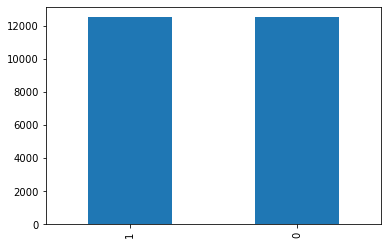

In [13]:
# 개와 고양이의 데이터가 어느정도 있는지 표로 보여주렴
df['category'].value_counts().plot.bar()

![](http://)From our data we have 12500 cats and 12500 dogs

# See sample image

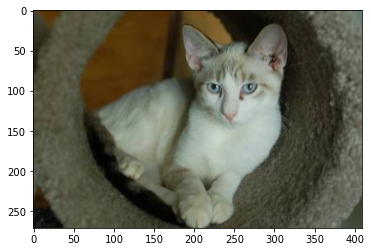

In [16]:
# 아무사진이나 띄워봐
sample = random.choice(filenames)
# TRAIN_PATH="/kaggle/working/train/"
image = load_img(TRAIN_PATH+sample)
# matplotlib 안에있는 이미지 띄워주는 함수 실행
plt.imshow(image)

# Build Model

In [17]:
# 지워도 상관없음
!pip install efficientnet

     |████████████████████████████████| 50 kB 493 kB/s eta 0:00:01
You should consider upgrading via the '/opt/conda/bin/python3.7 -m pip install --upgrade pip' command.


In [18]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, GlobalMaxPooling2D, GlobalAveragePooling2D
from tensorflow.keras.applications import EfficientNetB4

import efficientnet.keras as efn 
n_classes = 2

# weights : 'imagenet'(ImageNet 사전 학습)
# include_top : 네트워크 상단에 완전 연결 계층을 포함할지 여부. 기본값은 True입니다.
# classes = 2(이미지를 분류 할 선택적 클래스 수) 
# input_shape : 선택적 모양 튜플 (IMAGE_HEIGHT, IMAGE_WIDTH, IMAGE_CHANNELS)
efficentNet = EfficientNetB4(weights = 'imagenet', include_top = False, classes = n_classes, input_shape = input_shape)

71688192/71686520 [==============================] - 3s 0us/step


In [ ]:
# include_top : 네트워크 상단에 완전 연결 계층을 포함할지 여부. 기본값은 True입니다.
# weights : None(무작위 초기화), 'imagenet'(ImageNet 사전 학습) 중 하나 또는로드 할 가중치 파일의 경로입니다. 기본값은 'imagenet'입니다.
# input_tensor : layers.Input()모델의 이미지 입력으로 사용할 선택적 Keras 텐서 (즉,의 출력 ).
# input_shape : 선택적 모양 튜플, include_topFalse 인 경우에만 지정됩니다 . 정확히 3 개의 입력 채널이 있어야합니다.
# pooling : 기능 추출을위한 선택적 풀링 모드 include_top입니다 False. 기본값은 없음입니다. - None모델의 출력이 마지막 컨벌루션 레이어의 4D 텐서 출력이됨을 의미합니다. - avg글로벌 평균 풀링이 마지막 컨벌루션 레이어의 출력에 적용되므로 모델의 출력이 2D 텐서가됩니다. - max글로벌 최대 풀링이 적용됨을 의미합니다.
# classes : 이미지를 분류 할 선택적 클래스 수로, include_topTrue 인 경우에만 지정 되고 weights인수가 지정 되지 않은 경우에만 지정됩니다. 기본값은 1000 (ImageNet 클래스 수)입니다.
# classifier_activation : A str또는 호출 가능. "상위"레이어에서 사용할 활성화 함수입니다. include_top=True.이 아니면 무시됩니다 . classifier_activation=None"최상위"레이어의 로짓을 반환하도록 설정 합니다. 기본값은 'softmax'입니다.include_top : 네트워크 상단에 완전 연결 계층을 포함할지 여부. 기본값은 True입니다.
# weights : None(무작위 초기화), 'imagenet'(ImageNet 사전 학습) 중 하나 또는로드 할 가중치 파일의 경로입니다. 기본값은 'imagenet'입니다.
# input_tensor : layers.Input()모델의 이미지 입력으로 사용할 선택적 Keras 텐서 (즉,의 출력 ).
# input_shape : 선택적 모양 튜플, include_topFalse 인 경우에만 지정됩니다 . 정확히 3 개의 입력 채널이 있어야합니다.
# pooling : 기능 추출을위한 선택적 풀링 모드 include_top입니다 False. 기본값은 없음입니다. - None모델의 출력이 마지막 컨벌루션 레이어의 4D 텐서 출력이됨을 의미합니다. - avg글로벌 평균 풀링이 마지막 컨벌루션 레이어의 출력에 적용되므로 모델의 출력이 2D 텐서가됩니다. - max글로벌 최대 풀링이 적용됨을 의미합니다.
# classes : 이미지를 분류 할 선택적 클래스 수로, include_topTrue 인 경우에만 지정 되고 weights인수가 지정 되지 않은 경우에만 지정됩니다. 기본값은 1000 (ImageNet 클래스 수)입니다.
# classifier_activation : A str또는 호출 가능. "상위"레이어에서 사용할 활성화 함수입니다. include_top=True.이 아니면 무시됩니다 . classifier_activation=None"최상위"레이어의 로짓을 반환하도록 설정 합니다. 기본값은 'softmax'입니다.

In [21]:
# 위에서 설정한 efficentNet 보기
efficentNet.summary()

Model: "efficientnetb4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
rescaling (Rescaling)           (None, 224, 224, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
normalization (Normalization)   (None, 224, 224, 3)  7           rescaling[0][0]                  
__________________________________________________________________________________________________
stem_conv_pad (ZeroPadding2D)   (None, 225, 225, 3)  0           normalization[0][0]              
_____________________________________________________________________________________

In [24]:
print(efficentNet.layers)
print(len(efficentNet.layers))  # 474

[<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f2e12f6e5d0>, <tensorflow.python.keras.layers.preprocessing.image_preprocessing.Rescaling object at 0x7f2e197ac290>, <tensorflow.python.keras.layers.preprocessing.normalization.Normalization object at 0x7f2e12482c50>, <tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f2e123acb10>, <tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f2e11b6e3d0>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f2e11b20dd0>, <tensorflow.python.keras.layers.core.Activation object at 0x7f2e11b2fc50>, <tensorflow.python.keras.layers.convolutional.DepthwiseConv2D object at 0x7f2e11b43690>, <tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f2e102f2890>, <tensorflow.python.keras.layers.core.Activation object at 0x7f2e102967d0>, <tensorflow.python.keras.layers.pooling.GlobalAveragePooling2D object at 0x7f2e10289690>, <tensorflow.python.keras.la

In [26]:
# efficentNet.layers 300 부터 trainable = True 설정 ==> 몇개를 학습시킬지
for layer in efficentNet.layers[300:]:
    layer.trainable = True

In [28]:
# 비어있는 신경망 선언
model = Sequential()

# 위에 300부터 trainable = True 를 진행한 efficentNet을 모델에 넣어준다
model.add(efficentNet)
# GlobalAveragePooling2D : n개의 채널을 평균하며 하나의 값으로 표현.
model.add(GlobalAveragePooling2D())
# Dropout은 완전연결 신경망에서 일부러 몇개의 신경망을 때내는것으로 과적합(overfiiting)을 방지
model.add(Dropout(0.2))

# n_classes = 2, activation = 'softmax'????
model.add(Dense(n_classes, activation = 'softmax'))

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb4 (Functional)  (None, 7, 7, 1792)        17673823  
_________________________________________________________________
global_average_pooling2d (Gl (None, 1792)              0         
_________________________________________________________________
dropout (Dropout)            (None, 1792)              0         
_________________________________________________________________
dense (Dense)                (None, 2)                 3586      
Total params: 17,677,409
Trainable params: 17,552,202
Non-trainable params: 125,207
_________________________________________________________________


In [29]:
#sgd = SGD(lr = lr, momentum = 0.9, nesterov = True)
adam = Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
es = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = es_patience, restore_best_weights = True, verbose = 1)
rlrop = ReduceLROnPlateau(monitor = 'val_loss', mode = 'min', patience = rlrop_patience, 
                        factor = decay_rate, min_lr = 1e-6, verbose = 1)

In [ ]:
# Adam
# lr: 0보다 크거나 같은 float 값. 학습률.
# beta_1: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
# beta_2: 0보다 크고 1보다 작은 float 값. 일반적으로 1에 가깝게 설정됩니다.
# epsilon: 0보다 크거나 같은 float형 fuzz factor. None인 경우 K.epsilon()이 사용됩니다.
# decay: 0보다 크거나 같은 float 값. 업데이트마다 적용되는 학습률의 감소율입니다.
# amsgrad: 불리언. Adam의 변형인 AMSGrad의 적용 여부를 설정합니다. AMSGrad는 "On the Convergence of Adam and Beyond" 논문에서 소개되었습니다.



In [30]:
# 옵티마이저는 Keras 모델을 컴파일하기 위해 필요한 두 개의 매개변수(parameter) 중 하나입니다.
# 손실은 categorical_crossentropy이라는 함수를 통해 optimizer는 위에서 정의한 adam으로 metrics에서 정확성만 보겠다
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['acc'])

# Callbacks

In [31]:
from keras.callbacks import EarlyStopping, ReduceLROnPlateau

**Early Stop**

To prevent over fitting we will stop the learning after 10 epochs and val_loss value not decreased

In [32]:
# 너무 많은 Epoch 은 overfitting 을 일으킨다. 하지만 너무 적은 Epoch 은 underfitting 을 일으킨다. 
# Epoch 을 정하는데 많이 사용되는 Early stopping 은 무조건 Epoch 을 많이 돌린 후, 특정 시점에서 멈추는 것이다. 
# 그 특정시점을 어떻게 정하느냐가 Early stopping 의 핵심이라고 할 수 있다.

earlystop = EarlyStopping(patience=10)

**Learning Rate Reduction**

We will reduce the learning rate when then accuracy not increase for 2 steps

In [33]:
# 콜백함수 ReduceLROnPlateau
# 학습률이 개선되지 않을 때, 학습률을 동적으로 조정하여 학습률을 개선하는 효과를 기대할 수 있습니다
learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

In [34]:
# patience 는 성능이 증가하지 않는 epoch 을 몇 번이나 허용할 것인가를 정의한다
# earlystop = EarlyStopping(patience=10)

callbacks = [earlystop, learning_rate_reduction]

# Prepare data

Because we will use image genaretor `with class_mode="categorical"`. We need to convert column category into string. Then imagenerator will convert it one-hot encoding which is good for our classification. 

So we will convert 1 to dog and 0 to cat

In [35]:
df["category"] = df["category"].replace({0: 'cat', 1: 'dog'}) 

In [36]:
# train_test_split 모듈을 활용하여 손쉽게 train set(학습 데이터 셋)과 test set(테스트 셋)을 분리할 수 있습니다.
train_df, validate_df = train_test_split(df, test_size=0.20, random_state=42)
# reset_index은 index를 reset할때 사용되며 drop은 인덱스로 세팅한 열을 삭제할지 여부이다
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True)

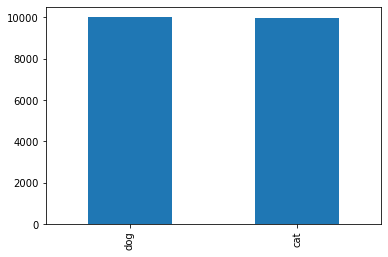

In [37]:
# 그래프
train_df['category'].value_counts().plot.bar()

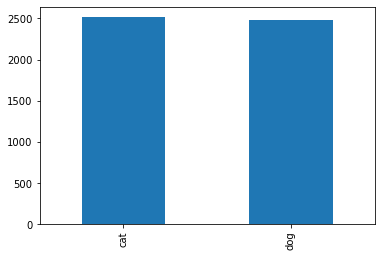

In [38]:
validate_df['category'].value_counts().plot.bar()

In [39]:
total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=16


# Traning Generator

In [40]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    TRAIN_PATH, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 20000 validated image filenames belonging to 2 classes.


### Validation Generator

In [41]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    TRAIN_PATH, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical',
    batch_size=batch_size
)

Found 5000 validated image filenames belonging to 2 classes.


# See how our generator work

In [42]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    TRAIN_PATH, 
    x_col='filename',
    y_col='category',
    target_size=IMAGE_SIZE,
    class_mode='categorical'
)

Found 1 validated image filenames belonging to 1 classes.


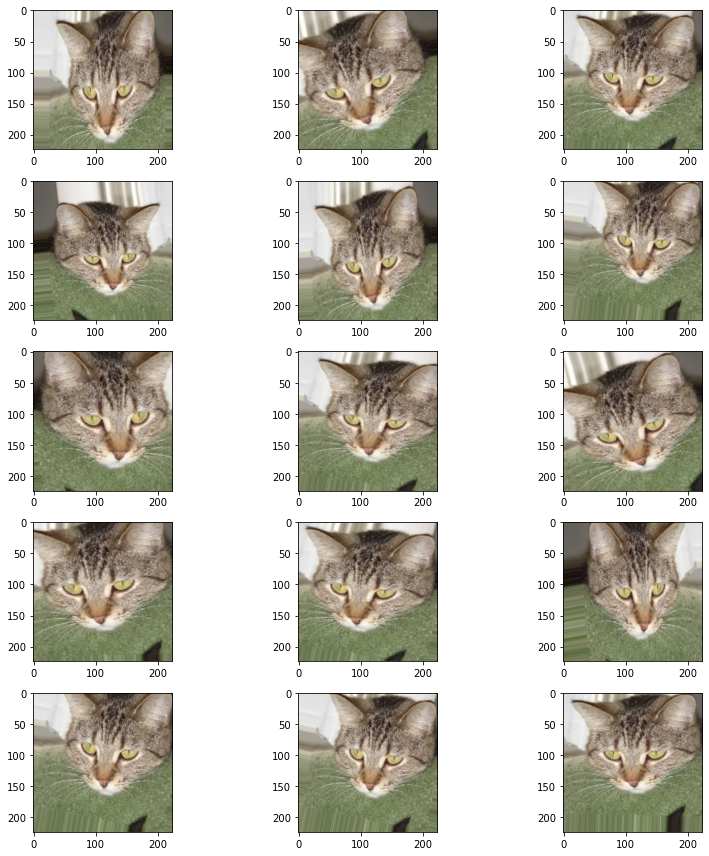

In [43]:
# 더많은양의 데이터를 얻기위해 기존사진에서 새로운 이미지 추출
plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

Seem to be nice 

In [ ]:
epochs=3 if FAST_RUN else num_epochs
history = model.fit_generator(
    train_generator, 
    epochs=7,
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    callbacks=callbacks
)

Epoch 1/7
 917/1250 [=====================>........] - ETA: 30:13 - loss: 0.1854 - acc: 0.9292

# Save Model

In [ ]:
model.save_weights("model.h5")

# Virtualize Training

In [ ]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 12))
ax1.plot(history.history['loss'], color='b', label="Training loss")
ax1.plot(history.history['val_loss'], color='r', label="validation loss")
ax1.set_xticks(np.arange(1, epochs, 1))
ax1.set_yticks(np.arange(0, 1, 0.1))

ax2.plot(history.history['acc'], color='b', label="Training accuracy")
ax2.plot(history.history['val_acc'], color='r',label="Validation accuracy")
ax2.set_xticks(np.arange(1, epochs, 1))

legend = plt.legend(loc='best', shadow=True)
plt.tight_layout()
plt.show()

# Prepare Testing Data

In [ ]:
#압축을 풀어준다.
import zipfile
myzip = zipfile.ZipFile('../input/dogs-vs-cats/test1.zip')
myzip.extractall('/kaggle/working')
myzip.close()

In [ ]:
import os
test_filenames = os.listdir(TEST_PATH)
test_df = pd.DataFrame({
    'filename': test_filenames
})
nb_samples = test_df.shape[0]

# Create Testing Generator

In [ ]:
test_gen = ImageDataGenerator(rescale=1./255)
test_generator = test_gen.flow_from_dataframe(
    test_df, 
    TEST_PATH, 
    x_col='filename',
    y_col=None,
    class_mode=None,
    target_size=IMAGE_SIZE,
    batch_size=batch_size,
    shuffle=False
)

# Predict

In [ ]:
predict = model.predict_generator(test_generator, steps=np.ceil(nb_samples/batch_size))

For categoral classication the prediction will come with probability of each category. So we will pick the category that have the highest probability with numpy average max

In [ ]:
test_df['category'] = np.argmax(predict, axis=-1)

We will convert the predict category back into our generator classes by using `train_generator.class_indices`. It is the classes that image generator map while converting data into computer vision

In [ ]:
label_map = dict((v,k) for k,v in train_generator.class_indices.items())
test_df['category'] = test_df['category'].replace(label_map)

From our prepare data part. We map data with `{1: 'dog', 0: 'cat'}`. Now we will map the result back to dog is 1 and cat is 0

In [ ]:
test_df['category'] = test_df['category'].replace({ 'dog': 1, 'cat': 0 })

### Virtaulize Result

In [ ]:
test_df['category'].value_counts().plot.bar()

### See predicted result with images

In [ ]:
sample_test = test_df.head(18)
sample_test.head()
plt.figure(figsize=(12, 24))
for index, row in sample_test.iterrows():
    filename = row['filename']
    category = row['category']
    img = load_img(TEST_PATH+filename, target_size=IMAGE_SIZE)
    plt.subplot(6, 3, index+1)
    plt.imshow(img)
    plt.xlabel(filename + '(' + "{}".format(category) + ')' )
plt.tight_layout()
plt.show()

# Submission

In [ ]:
submission_df = test_df.copy()
submission_df['id'] = submission_df['filename'].str.split('.').str[0]
submission_df['label'] = submission_df['category']
submission_df.drop(['filename', 'category'], axis=1, inplace=True)
submission_df.to_csv('submission.csv', index=False)